# Testing which algorithm is best for weather data

In [1]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
# Manually Created the dataset for mangalore region.

data = pd.read_csv('Dataset.csv')
data.head()

,datetime,tempmax,tempmin,temp,humidity,description
0,2/1/2022,32.888889,23.0,27.277778,70.9,Clear conditions throughout the day.
1,2/2/2022,32.000000,23.0,27.166667,72.1,Clear conditions throughout the day.
2,2/3/2022,31.111111,23.0,26.611111,72.4,Clear conditions throughout the day.
3,2/4/2022,30.055556,21.0,25.388889,66.4,Partly cloudy throughout the day.
4,2/5/2022,30.000000,20.0,24.666667,69.1,Clear conditions throughout the day.


In [3]:
weather_conditions_dict = {
    "Clear conditions throughout the day.": "Sunny",
    "Partly cloudy throughout the day.": "Partly Cloudy",
    "Clearing in the afternoon.": "Partly Cloudy",
    "Partly cloudy throughout the day with early morning rain.": "Rainy",
    "Partly cloudy throughout the day with late afternoon rain.": "Rainy",
    "Partly cloudy throughout the day with morning rain.": "Rainy",
    "Cloudy skies throughout the day with morning rain.": "Rainy",
    "Partly cloudy throughout the day with rain in the morning and afternoon.": "Rainy",
    "Cloudy skies throughout the day with rain.": "Rainy",
    "Cloudy skies throughout the day.": "Cloudy",
    "Cloudy skies throughout the day with a chance of rain throughout the day.": "Rainy",
    "Cloudy skies throughout the day with afternoon rain.": "Rainy",
    "Partly cloudy throughout the day with rain.": "Rainy",
    "Partly cloudy throughout the day with a chance of rain throughout the day.": "Rainy",
    "Partly cloudy throughout the day with afternoon rain.": "Rainy",
    "Partly cloudy throughout the day with rain clearing later.": "Rainy",
    "Cloudy skies throughout the day with rain in the morning and afternoon.": "Rainy",
    "Cloudy skies throughout the day with rain clearing later.": "Rainy",
    "Clearing in the afternoon with morning rain.": "Rainy",
    "Becoming cloudy in the afternoon.": "Cloudy",
    "Cloudy skies throughout the day with late afternoon rain.": "Rainy",
    "Becoming cloudy in the afternoon with early morning rain.": "Rainy",
    "Clearing in the afternoon with afternoon rain.": "Rainy",
    "Clearing in the afternoon with early morning rain.": "Rainy",
    "Becoming cloudy in the afternoon with afternoon rain.": "Rainy",
    "Partly cloudy throughout the day with a chance of rain or snow throughout the day.": "Rainy",
    "Clearing in the afternoon with rain.": "Rainy",
    "Clear conditions throughout the day with morning rain.": "Rainy",
    "Partly cloudy throughout the day with rain or snow in the morning and afternoon.": "Rainy",
    "Cloudy skies throughout the day with early morning rain.": "Rainy",
    "Becoming cloudy in the afternoon with late afternoon rain.": "Rainy",
    "Partly cloudy throughout the day with rain or snow clearing later.": "Rainy",
    "Clear conditions throughout the day with rain.": "Rainy",
    "Becoming cloudy in the afternoon with a chance of rain throughout the day.": "Rainy",
    "Clear conditions throughout the day with early morning rain.": "Rainy"
}

In [4]:
data['mapped_desc'] = data['description'].map(weather_conditions_dict)

In [5]:
label_encoder = LabelEncoder()
data['description_encoded'] = label_encoder.fit_transform(data['mapped_desc'])

In [6]:
# Define features and target variable
X = data[['temp', 'humidity']]
y = data['description_encoded']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Initialize a dictionary to hold model names and accuracies
results = {}

In [9]:
# List of classifiers to evaluate
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(kernel='linear'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Naive Bayes": GaussianNB()
}

In [10]:
# Train and evaluate each classifier
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy * 100  # Convert to percentage

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [11]:
# Print results
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.2f}%")

Logistic Regression: 76.26%
Support Vector Machine: 74.75%
K-Nearest Neighbors: 72.73%
Decision Tree: 68.69%
Random Forest: 71.72%
Gradient Boosting: 73.23%
AdaBoost: 71.72%
Extra Trees: 67.17%
Naive Bayes: 75.25%


In [12]:
# Extracting model names and accuracies
models = list(results.keys())
accuracies = list(results.values())

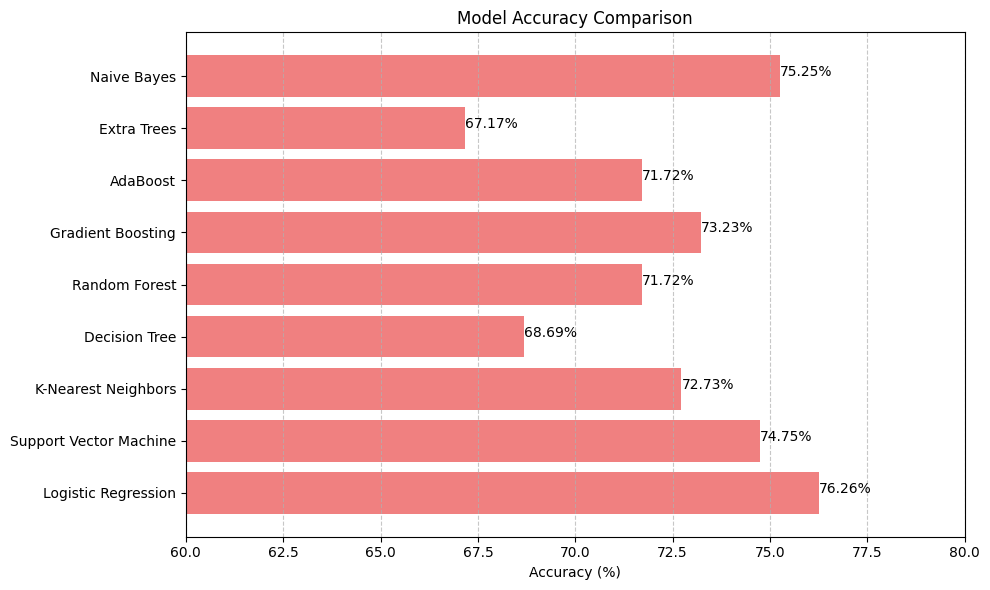

In [16]:
import matplotlib.pyplot as plt
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='lightcoral')
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xlim(60, 80)  # Setting a range for better visualization
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adding the accuracy value on each bar
for index, value in enumerate(accuracies):
    plt.text(value, index, f'{value:.2f}%')
    
# Display the plot
plt.tight_layout()
plt.show()